In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('..')

import prepare


Acquire

In [24]:
df = pd.read_json('data2.json')

Prepare

In [25]:
df = prepare.prepare_data(df)
df, _, _ = prepare.split_data(df)

In [26]:
df.head(3)

,repo,language,readme_contents,clean_text,stem,lemmatize,target
243,facebookresearch/Detectron,Python,**Detectron is deprecated. Please see [detectr...,detectron deprecated please see groundup rewri...,detectron deprec pleas see groundup rewrit det...,detectron deprecated please see groundup rewri...,1
10,github/docs,JavaScript,# GitHub Docs <!-- omit in toc -->\n\nThis rep...,github docs omit toc repository contains websi...,github doc omit toc repositori contain websit ...,github doc omit toc repository contains websit...,2
245,taizilongxu/interview_python,Shell,<!-- markdown-toc start - Don't edit this sect...,markdowntoc start dont edit section run mx tab...,markdowntoc start dont edit section run mx tab...,markdowntoc start dont edit section run mx tab...,0


Language Counts:
- 1: Python
- 2: Javascript
- 0: Other

In [27]:
pd.concat([df['target'].value_counts(),
           df['target'].value_counts(normalize=True)], axis=1)

,target,target
0,170,0.711297
2,38,0.158996
1,31,0.129707


**What are the most common words in READMEs?**

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/martinreyes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df[df['target']==1]

,repo,language,readme_contents,clean_text,stem,lemmatize,target
243,facebookresearch/Detectron,Python,**Detectron is deprecated. Please see [detectr...,detectron deprecated please see groundup rewri...,detectron deprec pleas see groundup rewrit det...,detectron deprecated please see groundup rewri...,1
253,tornadoweb/tornado,Python,Tornado Web Server\n==================\n\n.. i...,tornado web server image alt join chat target ...,tornado web server imag alt join chat target t...,tornado web server image alt join chat target ...,1
246,littlecodersh/ItChat,Python,# itchat\n\n[![Gitter][gitter-picture]][gitter...,itchat pypy pypy english itchatpython apitutor...,itchat pypi pypi english itchatpython apitutor...,itchat pypy pypy english itchatpython apitutor...,1
219,Yorko/mlcourse.ai,Python,"<div align=""center"">\n\n![ODS stickers](https:...",div aligncenter ods open machine learning cour...,div aligncent od open machin learn cours licen...,div aligncenter od open machine learning cours...,1
159,CorentinJ/Real-Time-Voice-Cloning,Python,# Real-Time Voice Cloning\nThis repository is ...,realtime voice cloning repository transfer lea...,realtim voic clone repositori transfer learn s...,realtime voice cloning repository transfer lea...,1
142,vnpy/vnpy,Python,"# VeighNa - By Traders, For Traders.\n\n<p ali...",veighna traders traders p aligncenter img src ...,veighna trader trader p aligncent img src p wa...,veighna trader trader p aligncenter img src p ...,1
117,openai/gym,Python,[![pre-commit](https://img.shields.io/badge/pr...,code style important notice team maintaining g...,code style import notic team maintain gym sinc...,code style important notice team maintaining g...,1
43,django/django,Python,======\nDjango\n======\n\nDjango is a high-lev...,django django highlevel python web framework e...,django django highlevel python web framework e...,django django highlevel python web framework e...,1
126,numpy/numpy,Python,"<h1 align=""center"">\n<img src=""https://raw.git...",h aligncenter img width hbr powered pypi conda...,h aligncent img width hbr power pypi conda sta...,h aligncenter img width hbr powered pypi conda...,1
21,TheAlgorithms/Python,Python,"<div align=""center"">\n<!-- Title: -->\n <a hr...",div aligncenter title img height ha algorithms...,div aligncent titl img height ha algorithmsa p...,div aligncenter title img height ha algorithms...,1


In [30]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


all_readme_contents = ' '.join(df['lemmatize'])
tokens = word_tokenize(all_readme_contents)
word_counts = Counter(tokens)

In [31]:
word_counts.most_common(20)

[('yes', 1755),
 ('source', 1535),
 ('free', 1411),
 ('data', 1171),
 ('javascript', 1165),
 ('api', 987),
 ('unknown', 919),
 ('code', 904),
 ('python', 851),
 ('file', 844),
 ('use', 820),
 ('open', 810),
 ('project', 802),
 ('img', 779),
 ('web', 750),
 ('using', 707),
 ('p', 699),
 ('value', 654),
 ('library', 654),
 ('c', 629)]

In [32]:
def find_most_common_words(df,
                           language = 'all',
                           stem_or_lem = 'lemmatize',
                           num_words = 20,
                           plot = True):
    
    df = df[df['target']==language] if type(language) == int else df
    all_readme_contents = ' '.join(df[stem_or_lem])
    tokens = word_tokenize(all_readme_contents)
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(num_words)
    
    if plot:
        colors = sns.color_palette("Blues", len(most_common_words))[::-1]
        sns.barplot(y = [word_freqs[0] for word_freqs in most_common_words],
                    x = [word_freqs[1] for word_freqs in most_common_words],
                    palette=colors)
        language_titles = {1: 'Python', 2: 'Javascript', 0: 'Other'}

        lang_title = language_titles.get(language, 'All')
        plt.title(f'{str(num_words)} Most Common Words for {lang_title}')
        
        plt.tick_params(axis='both', left=False, bottom=False)
        plt.xlabel('Word Count')
        sns.despine()
        plt.show()
    
    return most_common_words

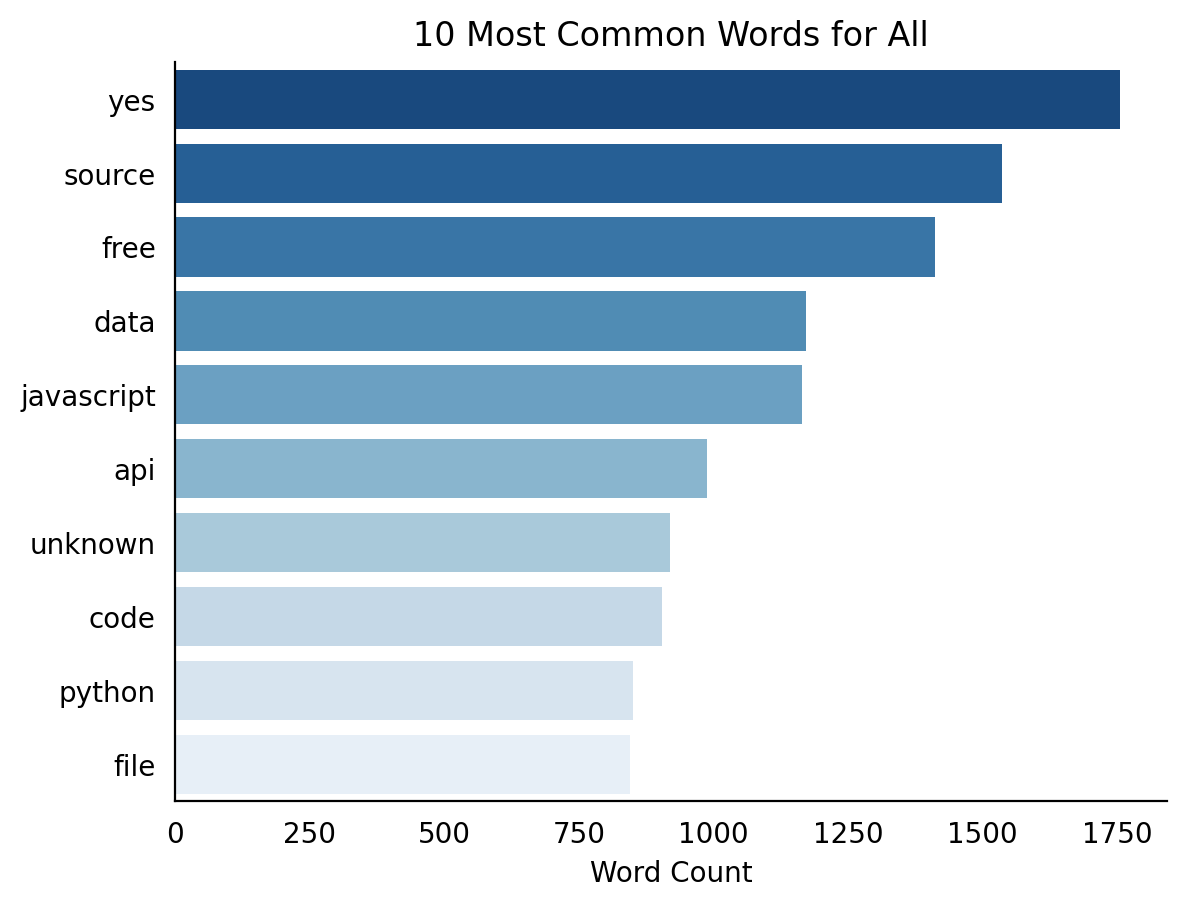

In [33]:
x = find_most_common_words(df,
                           language = 'all',
                           stem_or_lem = 'lemmatize',
                           num_words = 10)

**Does the length of the README vary by programming language?**


In [34]:
df['readme_length'] = df['readme_contents'].apply(len)
readme_lens = df.groupby('target')['readme_length'].median()
index_mapping = {0: 'other', 1: 'python', 2: 'javascript'}
readme_lens.index = readme_lens.sort_index().index.map(index_mapping)

In [35]:
readme_lens

target
other         6507.5
python        6047.0
javascript    5289.5
Name: readme_length, dtype: float64

In [ ]:
# Extract unique words data for each programming language
python_readme_lens = df[df['target'] == 1]['readme_length']
javascript_readme_lens = df[df['target'] == 2]['readme_length']
other_readme_lens = df[df['target'] == 0]['readme_length']

# Perform ANOVA test
f_statistic, p_value = f_oneway(python_readme_lens,
                                javascript_readme_lens,
                                other_readme_lens)

# Interpret the results
if p_value < 0.05:
    print("There are significant differences in the mean number of unique words among different programming languages.")
else:
    print("There are no significant differences in the mean number of unique words among different programming languages.")

In [53]:
def run_anova_test_for_readme_length(df):
    
    df['readme_length'] = df['readme_contents'].apply(len)
    readme_lens = df.groupby('target')['readme_length'].median()
    index_mapping = {0: 'other', 1: 'python', 2: 'javascript'}
    readme_lens.index = readme_lens.sort_index().index.map(index_mapping)
    
    # Extract unique words data for each programming language
    python_readme_lens = df[df['target'] == 1]['readme_length']
    javascript_readme_lens = df[df['target'] == 2]['readme_length']
    other_readme_lens = df[df['target'] == 0]['readme_length']

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(python_readme_lens,
                                    javascript_readme_lens,
                                    other_readme_lens)

    # Interpret the results
    if p_value < 0.05:
        print("There are significant differences in the average README length among different programming languages.")
    else:
        print("There are no significant differences in the average README length among different programming languages.")
    

In [54]:
run_anova_test_for_readme_length(df)

There are no significant differences in the average README length among different programming languages.


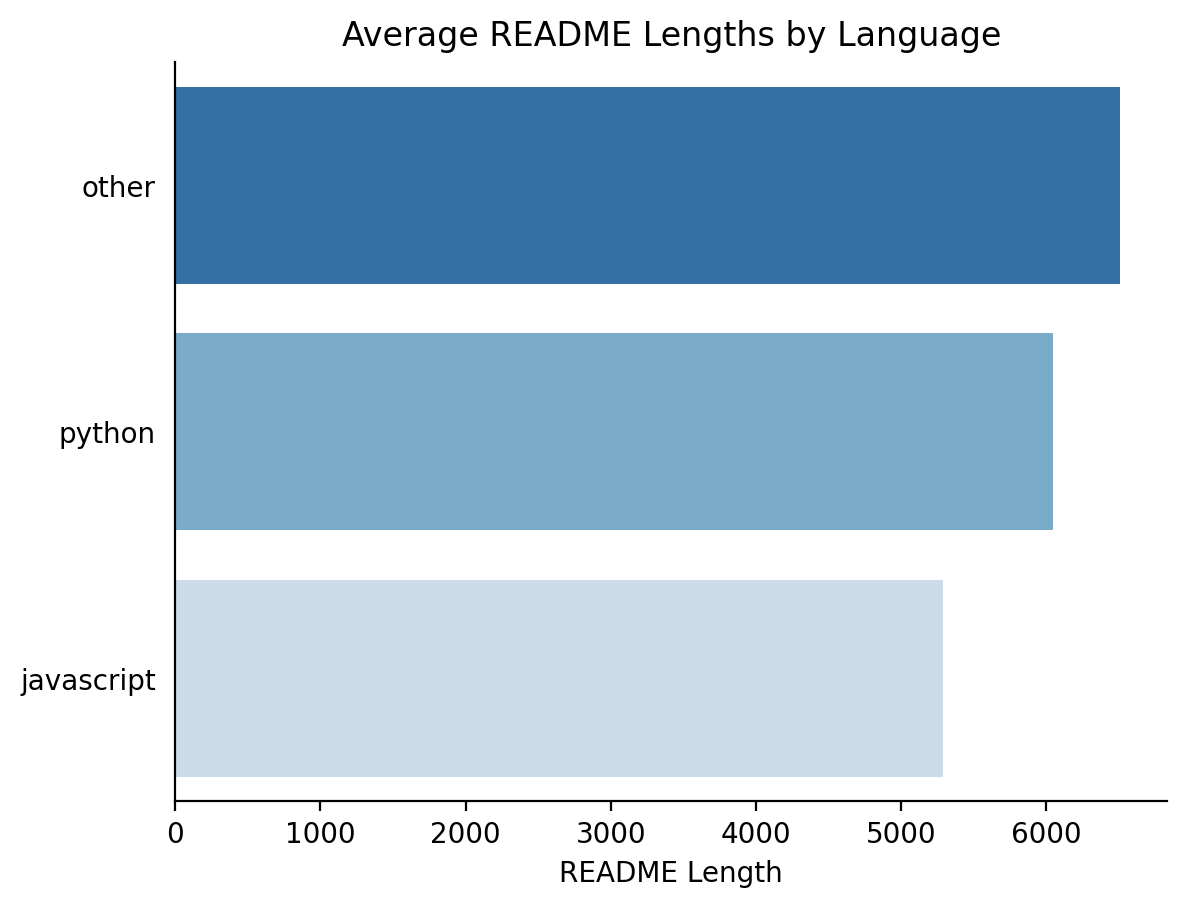

In [36]:
def plot_readme_lengths():
    
    df['readme_length'] = df['readme_contents'].apply(len)
    readme_lens = df.groupby('target')['readme_length'].median()
    index_mapping = {0: 'other', 1: 'python', 2: 'javascript'}
    readme_lens.index = readme_lens.sort_index().index.map(index_mapping)
    
    colors = sns.color_palette("Blues_r", len(readme_lens))
    sns.barplot(x = readme_lens.sort_values(ascending=False).values,
                y = readme_lens.sort_values(ascending=False).index,
                palette=colors)
    plt.title('Average README Lengths by Language')
    
    plt.tick_params(axis='both', left=False)
    plt.ylabel('')
    plt.xlabel('README Length')
    sns.despine()
    plt.show()
    
plot_readme_lengths()

**Do different programming languages use a different number of unique words?**


In [52]:
df

,repo,language,readme_contents,clean_text,stem,lemmatize,target,readme_length,unique_words
243,facebookresearch/Detectron,Python,**Detectron is deprecated. Please see [detectr...,detectron deprecated please see groundup rewri...,detectron deprec pleas see groundup rewrit det...,detectron deprecated please see groundup rewri...,1,7031,399
10,github/docs,JavaScript,# GitHub Docs <!-- omit in toc -->\n\nThis rep...,github docs omit toc repository contains websi...,github doc omit toc repositori contain websit ...,github doc omit toc repository contains websit...,2,3085,243
245,taizilongxu/interview_python,Shell,<!-- markdown-toc start - Don't edit this sect...,markdowntoc start dont edit section run mx tab...,markdowntoc start dont edit section run mx tab...,markdowntoc start dont edit section run mx tab...,0,44243,1734
253,tornadoweb/tornado,Python,Tornado Web Server\n==================\n\n.. i...,tornado web server image alt join chat target ...,tornado web server imag alt join chat target t...,tornado web server image alt join chat target ...,1,1599,119
225,docsifyjs/docsify,JavaScript,"<p align=""center"">\n <a href=""https://docsify...",p aligncenter img altdocsify p p aligncenter m...,p aligncent img altdocsifi p p aligncent magic...,p aligncenter img altdocsify p p aligncenter m...,2,4027,194
...,...,...,...,...,...,...,...,...,...
287,codecombat/codecombat,CoffeeScript,"# CodeCombat\n\n<div style=""text-align:center""...",codecombat div img src div build coverage code...,codecombat div img src div build coverag codec...,codecombat div img src div build coverage code...,0,9457,412
185,facebook/rocksdb,C++,## RocksDB: A Persistent Key-Value Store for F...,rocksdb persistent keyvalue store flash ram st...,rocksdb persist keyvalu store flash ram storag...,rocksdb persistent keyvalue store flash ram st...,0,1689,147
72,ansible/ansible,Python,[![PyPI version](https://img.shields.io/pypi/v...,pypi docs chat build ansible code ansible mail...,pypi doc chat build ansibl code ansibl mail re...,pypi doc chat build ansible code ansible maili...,1,5173,332
272,JeffreySu/WeiXinMPSDK,C#,"<img src=""https://sdk.weixin.senparc.com/image...",img sdk wechat net sdk build github commit act...,img sdk wechat net sdk build github commit act...,img sdk wechat net sdk build github commit act...,0,39094,1559


In [37]:
from scipy.stats import f_oneway

df['unique_words'] = df['readme_contents'].apply(lambda x: len(set(x.split())))

# Group the data by programming language and calculate the mean number of unique words
language_unique_words = df.groupby('target')['unique_words'].mean()

# Extract unique words data for each programming language
python_unique_words = df[df['target'] == 1]['unique_words']
javascript_unique_words = df[df['target'] == 2]['unique_words']
other_unique_words = df[df['target'] == 0]['unique_words']

# Perform ANOVA test
f_statistic, p_value = f_oneway(python_unique_words, javascript_unique_words, other_unique_words)

# Interpret the results
if p_value < 0.05:
    print("There are significant differences in the mean number of unique words among different programming languages.")
else:
    print("There are no significant differences in the mean number of unique words among different programming languages.")

There are no significant differences in the mean number of unique words among different programming languages.


In [38]:
df.groupby('target')['unique_words'].median()

target
0    291.0
1    332.0
2    282.5
Name: unique_words, dtype: float64

In [39]:
p_value

0.9247789267027375

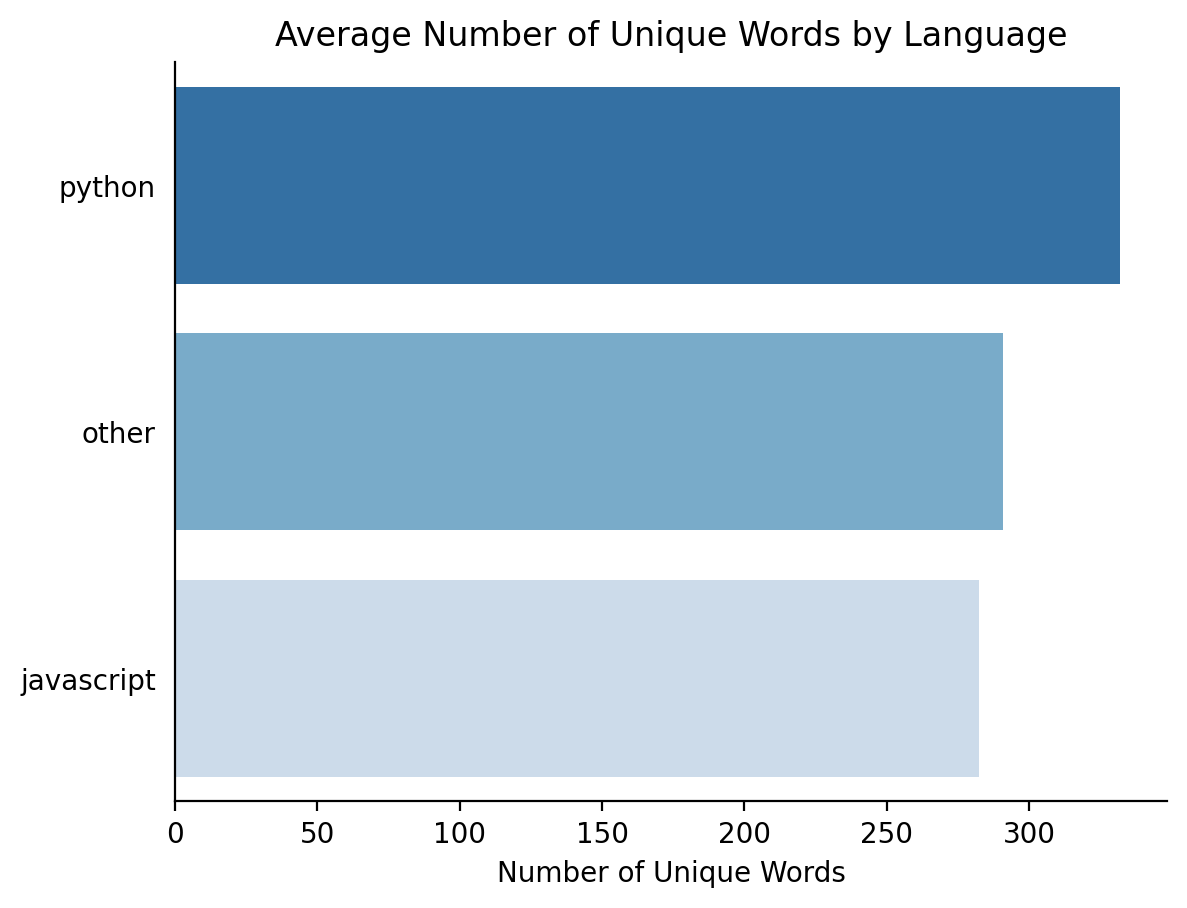

In [40]:
def plot_unique_word_averages(df):
    
    df['unique_words'] = df['readme_contents'].apply(lambda x: len(set(x.split())))
    unique_word_avgs = df.groupby('target')['unique_words'].median()
    index_mapping = {0: 'other', 1: 'python', 2: 'javascript'}
    unique_word_avgs.index = unique_word_avgs.sort_index().index.map(index_mapping)
    
    colors = sns.color_palette("Blues_r", len(unique_word_avgs))
    sns.barplot(x = unique_word_avgs.sort_values(ascending=False).values,
                y = unique_word_avgs.sort_values(ascending=False).index,
                palette=colors)
    plt.title('Average Number of Unique Words by Language')
    
    plt.tick_params(axis='both', left=False)
    plt.ylabel('')
    plt.xlabel('Number of Unique Words')
    sns.despine()
    plt.show()
    
plot_unique_word_averages(df)

In [ ]:
def run_anova_test_for_number_of_unique_words(df):
    df['unique_words'] = df['readme_contents'].apply(lambda x: len(set(x.split())))

    # Group the data by programming language and calculate the mean number of unique words
    language_unique_words = df.groupby('target')['unique_words'].mean()

    # Extract unique words data for each programming language
    python_unique_words = df[df['target'] == 1]['unique_words']
    javascript_unique_words = df[df['target'] == 2]['unique_words']
    other_unique_words = df[df['target'] == 0]['unique_words']

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(python_unique_words, javascript_unique_words, other_unique_words)

    # Interpret the results
    if p_value < 0.05:
        print("There are significant differences in the mean number of unique words among different programming languages.")
    else:
        print("There are no significant differences in the mean number of unique words among different programming languages.")

**Are there any words that uniquely identify a programming language?**

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a DataFrame 'df' with 'target' and 'readme_contents' columns
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatize'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                        columns=tfidf_vectorizer.get_feature_names_out())

# Add the 'target' column back to the DataFrame
tfidf_df['target'] = df['target']

# Group the data by programming language and calculate the mean TF-IDF scores for each word
language_tfidf = tfidf_df.groupby('target').mean()

In [42]:
# Specify the programming language you want to analyze (e.g., Python)
programming_language = 2

# Get words with the highest mean TF-IDF score for the specified programming language
top_words = language_tfidf.loc[programming_language].nlargest(10)
print("Top words for the programming language:")
print(top_words)

Top words for the programming language:
spring        0.068884
img           0.036787
security      0.034609
file          0.029935
widthpx       0.028684
generator     0.028440
alt           0.027392
tensorflow    0.026720
td            0.026615
project       0.026339
Name: 2.0, dtype: float64


In [50]:
def identify_unique_words(df, plot=True):
    
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatize'])
    
    # Convert TF-IDF matrix to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                            columns=tfidf_vectorizer.get_feature_names_out())
    
    # Add the 'target' column back to the DataFrame
    tfidf_df['target'] = df['target']
    
    # Group the data by programming language and calculate the mean TF-IDF scores for each word
    language_tfidf = tfidf_df.groupby('target').mean()
    
    for i, language in enumerate(['Other', 'Python', 'Javascript']):
        # Get words with the highest mean TF-IDF score for the specified programming language
        
        top_words = language_tfidf.loc[i].sort_values(ascending=False).head(5)
        print(f"{language}:")
        print(top_words, '\n')
    
        if plot:
            plt.figure(figsize=(6,3))
            colors = sns.color_palette("Blues", len(top_words))[::-1]
            sns.barplot(x = top_words.sort_values(ascending=False).values,
                        y = top_words.sort_values(ascending=False).index,
                        palette=colors)
            language_titles = {1: 'Python', 2: 'Javascript', 0: 'Other'}

            lang_title = language_titles.get(language, 'All')
            plt.title(f'Unique Words for {language}')

            plt.tick_params(axis='both', left=False, bottom=False)
            plt.xlabel('TF-IDF score')
            sns.despine()
            plt.show()
        print('-'*50)

Other:
img           0.029869
code          0.027694
project       0.022915
javascript    0.022079
learning      0.021969
Name: 0.0, dtype: float64 



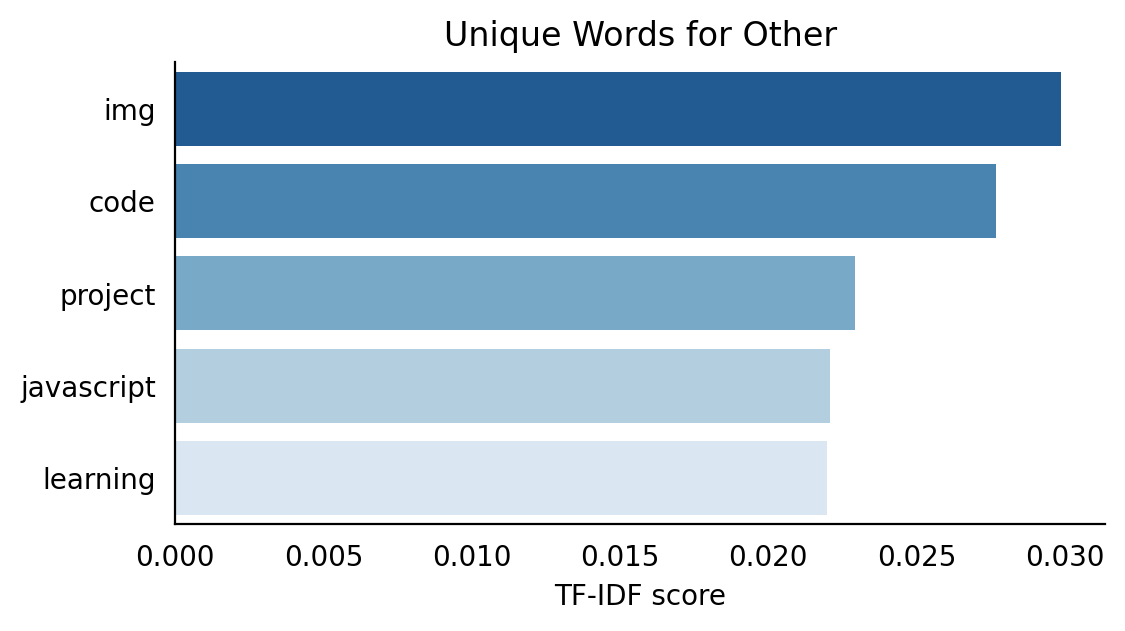

--------------------------------------------------
Python:
data       0.047977
img        0.040956
spring     0.040936
tidb       0.037057
request    0.036126
Name: 1.0, dtype: float64 



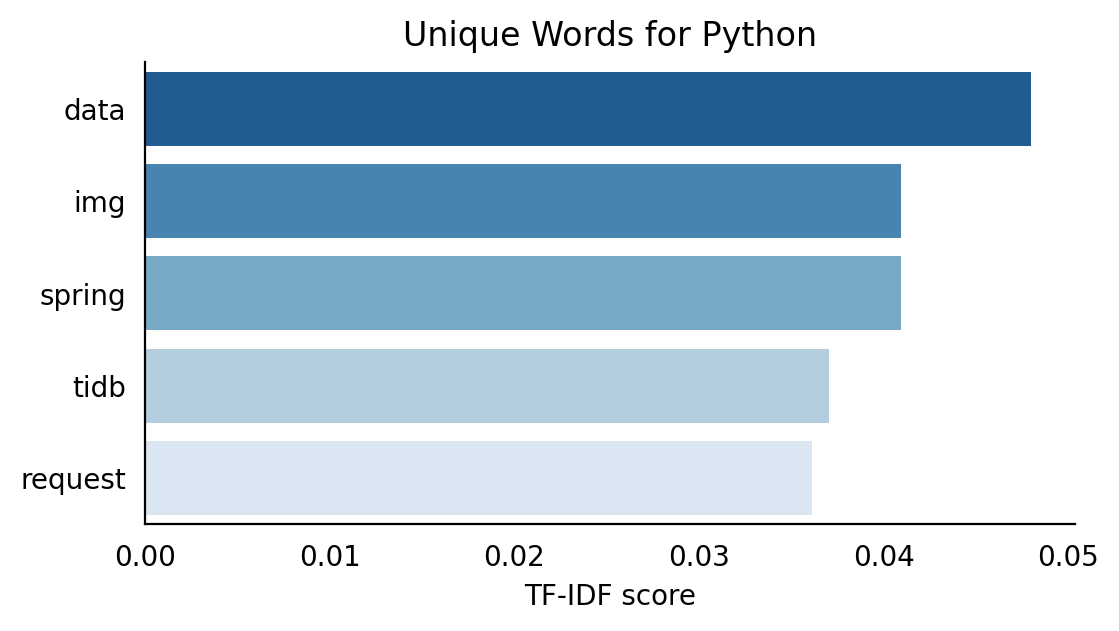

--------------------------------------------------
Javascript:
spring      0.068884
img         0.036787
security    0.034609
file        0.029935
widthpx     0.028684
Name: 2.0, dtype: float64 



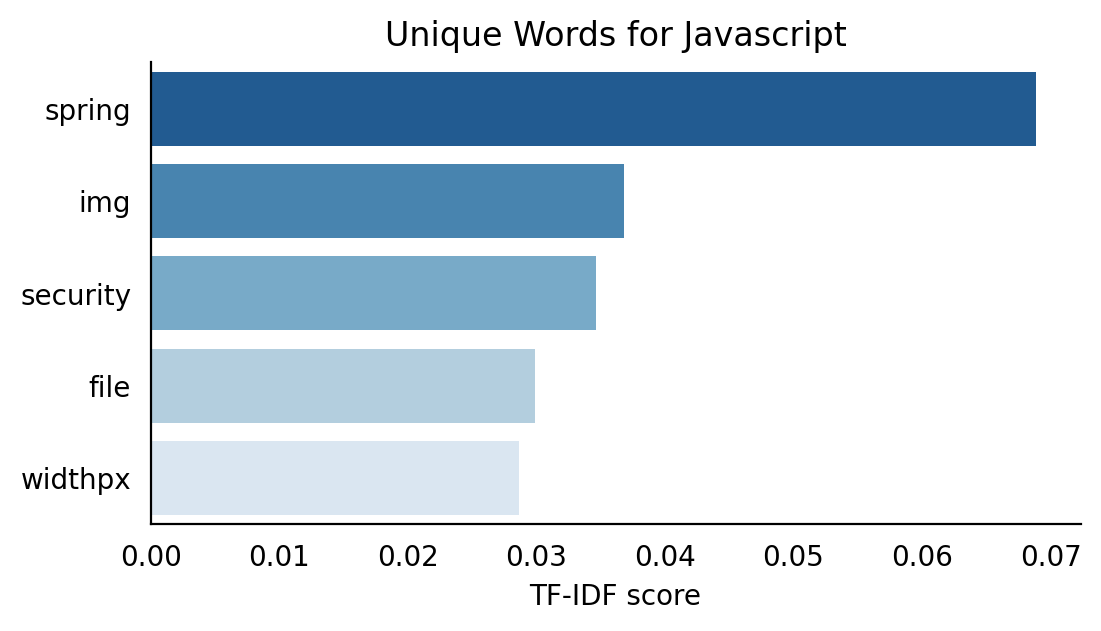

--------------------------------------------------


In [51]:
identify_unique_words(df)

---
**Visuals for slides**

(\#ece4db)

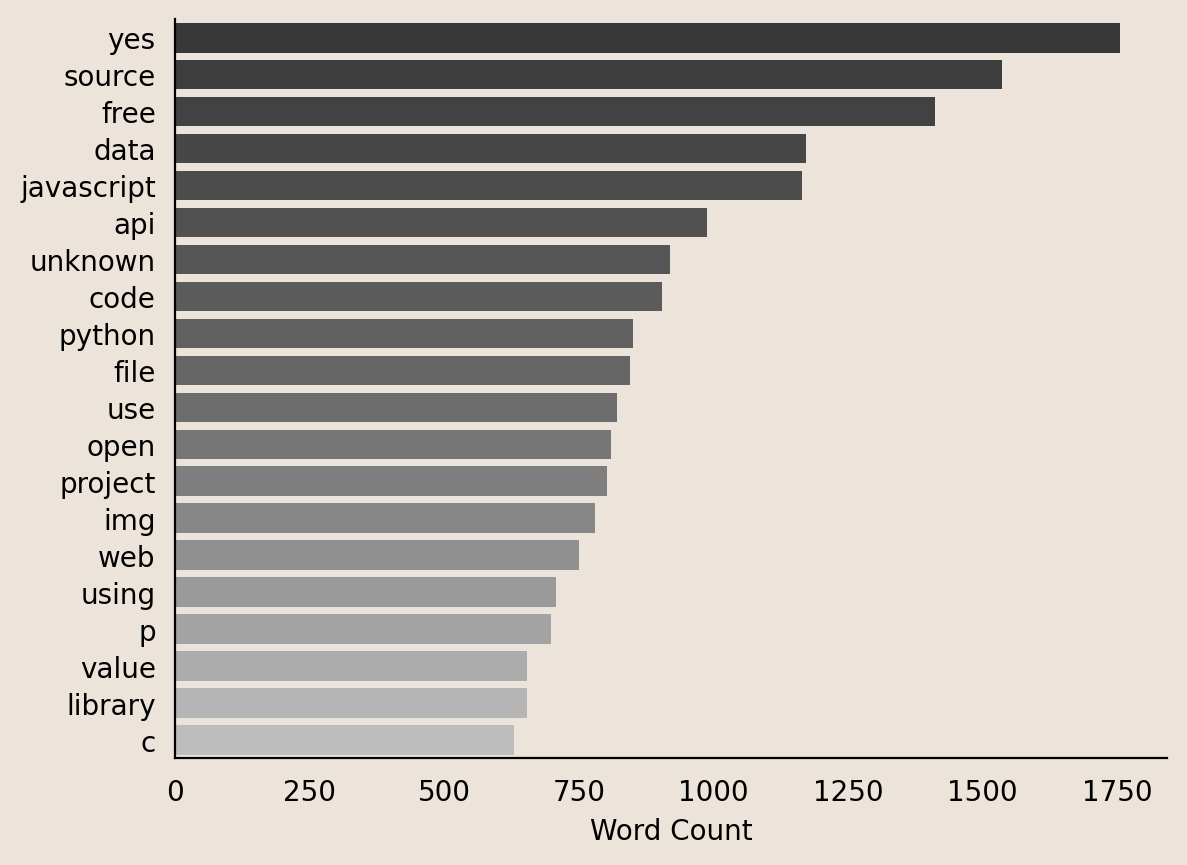

In [68]:
def find_most_common_words(df,
                           language = 'all',
                           stem_or_lem = 'lemmatize',
                           num_words = 20,
                           plot = True):
    
    df = df[df['target']==language] if type(language) == int else df
    all_readme_contents = ' '.join(df[stem_or_lem])
    tokens = word_tokenize(all_readme_contents)
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(num_words)
    
    if plot:
        colors = sns.color_palette("Greys_d", len(most_common_words))[::-1]
        sns.barplot(y = [word_freqs[0] for word_freqs in most_common_words],
                    x = [word_freqs[1] for word_freqs in most_common_words],
                    palette=colors)
        language_titles = {1: 'Python', 2: 'Javascript', 0: 'Other'}

        lang_title = language_titles.get(language, 'All')
        
        fig = plt.gcf()
        fig.set_facecolor('#ece4db') 
        ax = plt.gca()
        ax.set_facecolor('#ece4db')
        plt.tick_params(axis='both', left=False, bottom=False)
        plt.xlabel('Word Count')
        sns.despine()
        plt.show()
    
    return most_common_words

find_most_common_words(df);

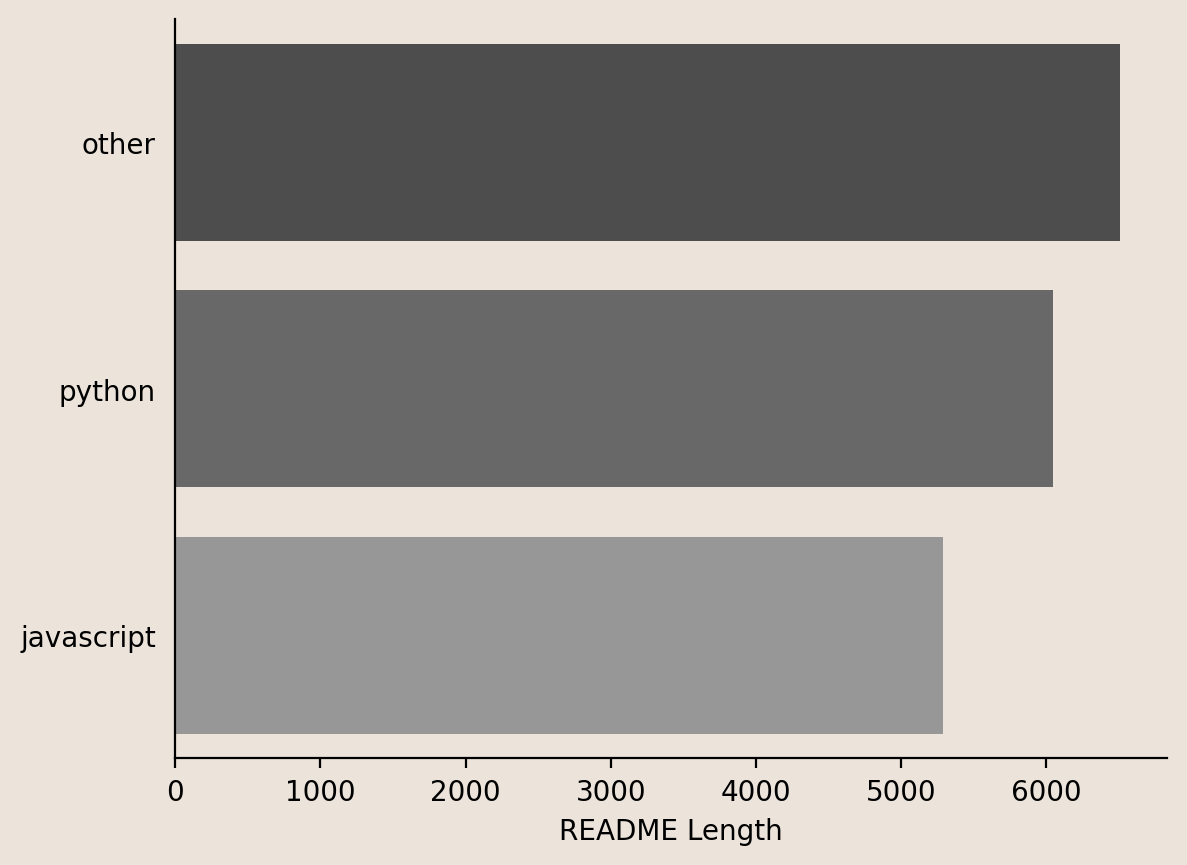

In [78]:
def plot_readme_lengths():
    
    df['readme_length'] = df['readme_contents'].apply(len)
    readme_lens = df.groupby('target')['readme_length'].median()
    index_mapping = {0: 'other', 1: 'python', 2: 'javascript'}
    readme_lens.index = readme_lens.sort_index().index.map(index_mapping)
    
    colors = sns.color_palette("Greys_d", len(readme_lens))[::-1]
    sns.barplot(x = readme_lens.sort_values(ascending=False).values,
                y = readme_lens.sort_values(ascending=False).index,
                palette=colors)
    
    fig = plt.gcf()
    fig.set_facecolor('#ece4db') 
    ax = plt.gca()
    ax.set_facecolor('#ece4db')
    
    plt.tick_params(axis='both', left=False)
    plt.ylabel('')
    plt.xlabel('README Length')
    sns.despine()
    plt.show()
    
plot_readme_lengths()

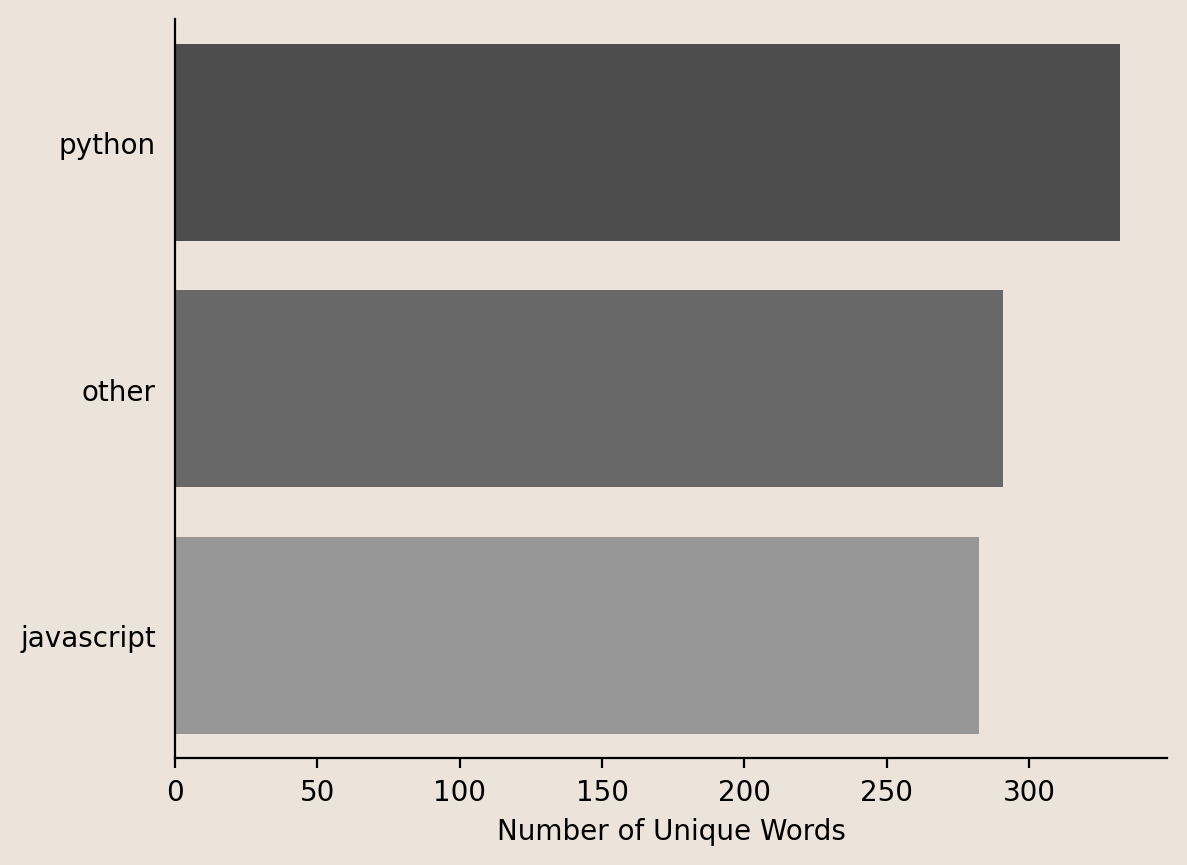

In [81]:
def plot_unique_word_averages(df):
    
    df['unique_words'] = df['readme_contents'].apply(lambda x: len(set(x.split())))
    unique_word_avgs = df.groupby('target')['unique_words'].median()
    index_mapping = {0: 'other', 1: 'python', 2: 'javascript'}
    unique_word_avgs.index = unique_word_avgs.sort_index().index.map(index_mapping)
    
    colors = sns.color_palette("Greys_d", len(unique_word_avgs))[::-1]
    sns.barplot(x = unique_word_avgs.sort_values(ascending=False).values,
                y = unique_word_avgs.sort_values(ascending=False).index,
                palette=colors)

    fig = plt.gcf()
    fig.set_facecolor('#ece4db') 
    ax = plt.gca()
    ax.set_facecolor('#ece4db')
    
    plt.tick_params(axis='both', left=False)
    plt.ylabel('')
    plt.xlabel('Number of Unique Words')
    sns.despine()
    plt.show()
    
plot_unique_word_averages(df)

Other:
img           0.029869
code          0.027694
project       0.022915
javascript    0.022079
learning      0.021969
Name: 0.0, dtype: float64 



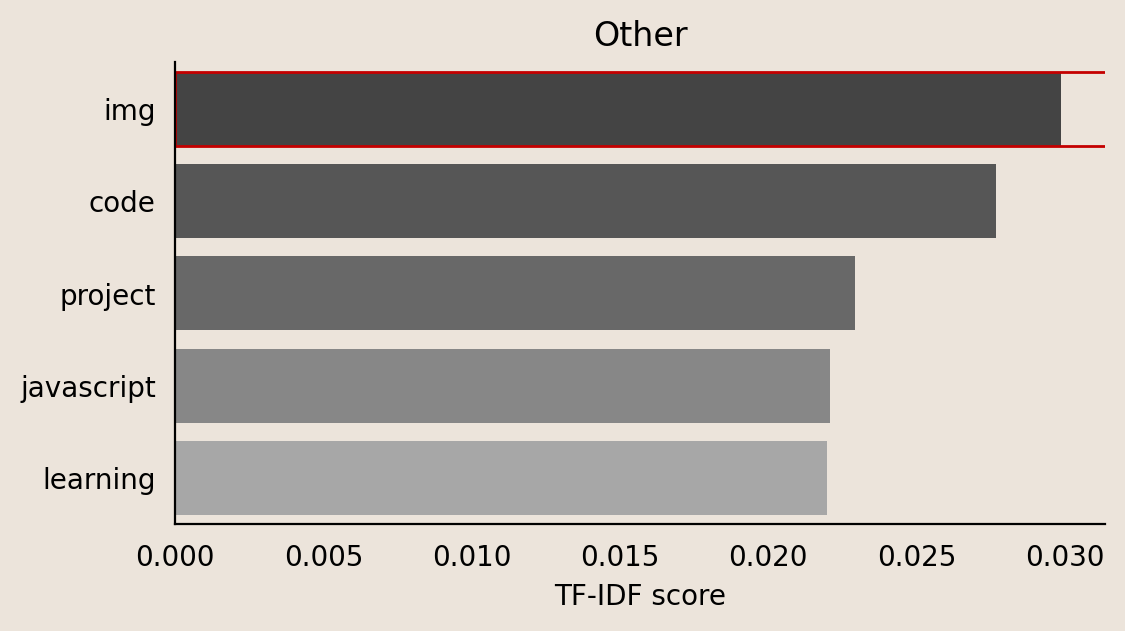

--------------------------------------------------
Python:
data       0.047977
img        0.040956
spring     0.040936
tidb       0.037057
request    0.036126
Name: 1.0, dtype: float64 



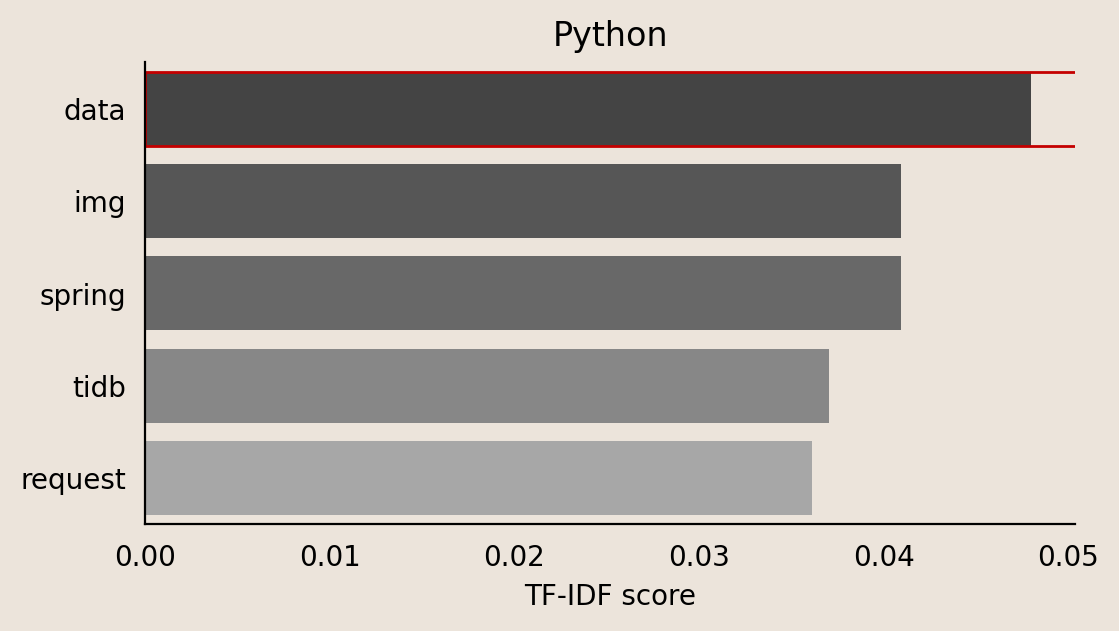

--------------------------------------------------
Javascript:
spring      0.068884
img         0.036787
security    0.034609
file        0.029935
widthpx     0.028684
Name: 2.0, dtype: float64 



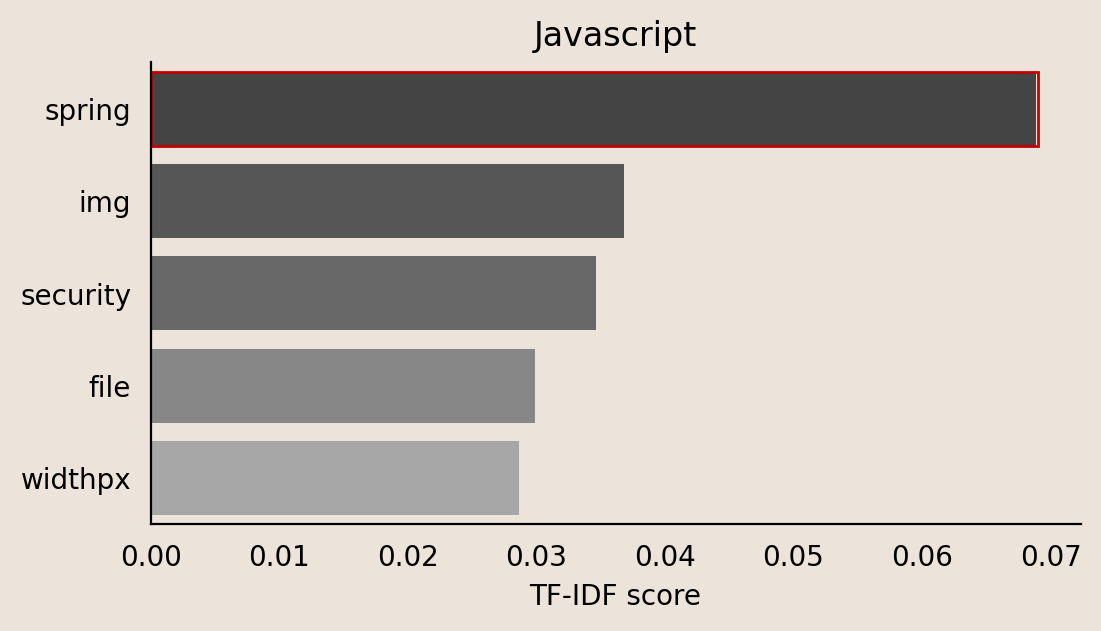

--------------------------------------------------


In [111]:
from matplotlib import patches
def identify_unique_words(df, plot=True):
    
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatize'])
    
    # Convert TF-IDF matrix to DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                            columns=tfidf_vectorizer.get_feature_names_out())
    
    # Add the 'target' column back to the DataFrame
    tfidf_df['target'] = df['target']
    
    # Group the data by programming language and calculate the mean TF-IDF scores for each word
    language_tfidf = tfidf_df.groupby('target').mean()
    
    for i, language in enumerate(['Other', 'Python', 'Javascript']):
        # Get words with the highest mean TF-IDF score for the specified programming language
        
        top_words = language_tfidf.loc[i].sort_values(ascending=False).head(5)
        print(f"{language}:")
        print(top_words, '\n')
    
        if plot:
            plt.figure(figsize=(6,3))
            colors = sns.color_palette("Greys_d", len(top_words))[::-1]
            sns.barplot(x = top_words.sort_values(ascending=False).values,
                        y = top_words.sort_values(ascending=False).index,
                        palette=colors)
            language_titles = {1: 'Python', 2: 'Javascript', 0: 'Other'}

            lang_title = language_titles.get(language, 'All')
            plt.title(language)

            plt.tick_params(axis='both', left=False, bottom=False)
            plt.xlabel('TF-IDF score')
            
            fig = plt.gcf()
            fig.set_facecolor('#ece4db') 
            ax = plt.gca()
            ax.set_facecolor('#ece4db')
            
            rectangle = patches.Rectangle((0, -.4), .069, .8, linewidth=1,
                              edgecolor='#C40000', facecolor='none')
            ax.add_patch(rectangle)
            
            sns.despine()
            plt.show()
        print('-'*50)
        
        
        
        
identify_unique_words(df, plot=True)

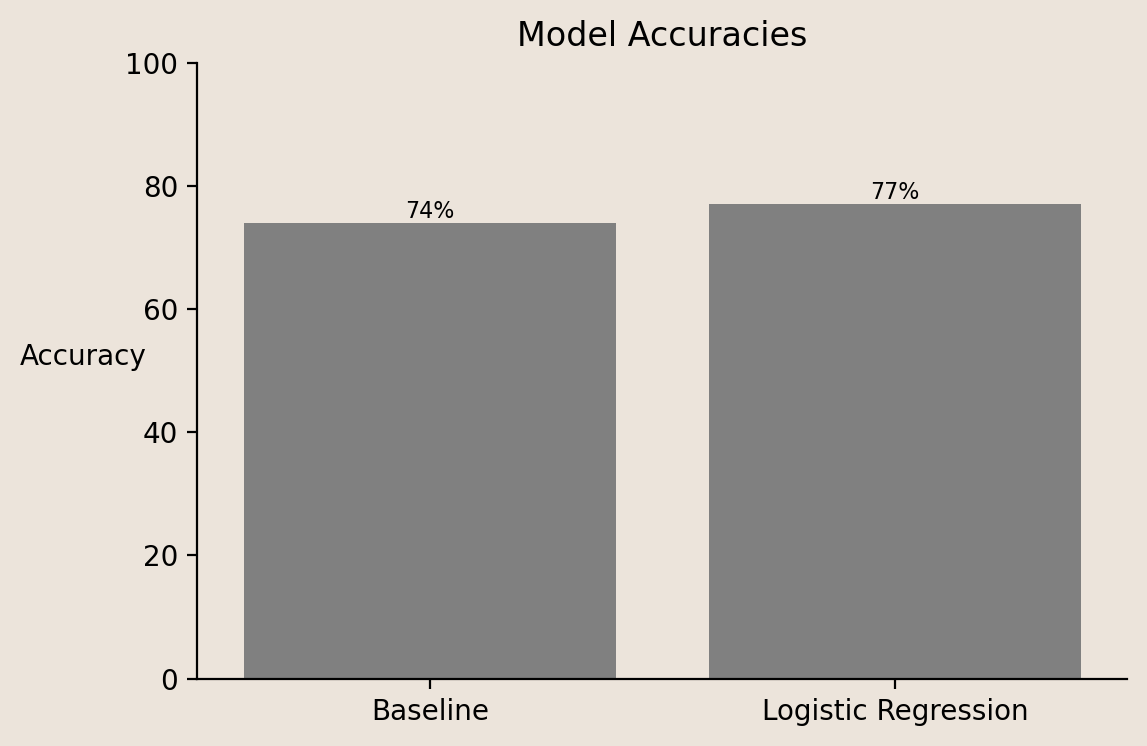

In [132]:
data = {'Percentage': [74, 77]}
labels = ['Baseline', 'Logistic Regression']

df = pd.DataFrame(data, index=labels)

plt.figure(figsize=(6, 4))
sns.barplot(x=df.index, y='Percentage', data=df, color='grey')

plt.title('Model Accuracies')
plt.ylabel('Accuracy', rotation=0, labelpad=15)
plt.ylim(0, 100)

fig = plt.gcf()
fig.set_facecolor('#ece4db') 
ax = plt.gca()
ax.set_facecolor('#ece4db')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

sns.despine()

plt.show()

README

<a name="top"></a>

# Project: Predicting MLB Team Wins + Analyzing Stats that Lead to Wins

by Martin Reyes

Note: project done in [this](https://github.com/prestige-worldwide-1/baseball-project#date-dictionary) repo

**Description:**

In this project, README's from GitHub repositories are analyzed and modelled using natural language processing techniques. The repositories contain primarily "Python", "Javascript", or "Other" files. Repo names are scraped from the most popular repositories on GitHub. The README contents are then acquired using GitHub's API. After the data is acquired, the README contents are cleaned and prepared so they can be analyzed. Analysis and stats test will be done to compare things such as length and unique words. NLP techniques and classification models will be used to predict which language is primarily used in the GitHub repos.

**Goals:**

- analyze GitHub repository README's and how they compare whether the repository primarily consists of Python, Javascript, or other programming languages.
- predict whether a GitHub Repository primarily consists of Python files, Javascript files, or other files.


## Acquire Data

1. GitHub repository names are scraped from GitHub's most [forked](https://github.com/search?o=desc&q=stars:%3E1&s=forks&type=Repositories) and [starred](https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories) repositories. 
2. After the list of repo names are scraped, the names are run through GitHub's API to get the README contents along with the primary language of the repo.
3. The data is then saved into a [json file]('data2.json').

## Prepare Data
1. README's are cleaned:
    1. characters are lowered
    1. removed punctuation, numbers, extra whitespaces, long words, accented/special characters, and stopwords
    1. text is tokenized (broken down into smaller units)
    1. stemmed and lemmatized versions of the README's are saved
2. Languages are categorized into `Python` (1), `Javascript` (2), and `Other` (0)


## Data Exploration (EDA)

Data is split into training and test data. Analysis is performed on training data to avoid bias and data leakage during modeling. 

Test data is separated to test ML regression models later in the project.

**What are the most common words throughout all README's?**

<img src="viz/common_words.png" alt="common_words.png" width="600">


**Does the length of the README vary by programming language?**

<img src="viz/readme_lengths.png" alt="readme_lengths.png" width="600">


**Do different programming languages use a different number of unique words?**

<img src="viz/num_unique_words.png" alt="num_unique_words.png" width="600">


**Are there any words that uniquely identify a programming language?**

<img src="viz/unique_words_python.png" alt="unique_words_python.png" width="600">

<img src="viz/unique_words_javascript.png" alt="unique_words_javascript.png" width="600">



## Machine Learning Models: NLP and Classification

**Baseline Model**

- `sklearn`'s `DummyClassifier`, which makes a constant prediction of the most frequent target class, `Other`.
- Model accuracy is 74% on the validation set.

**Best Regression Model: Logistic Regression**

- Model predictions are off by about 6 wins, on average, and explain 77% of the variance.

| Model              | Accuracy   |
| :----------------- | ---------- |
| Baseline           |  74%       |
| Logistic Regression  |  77%      |


## Conclusion

### Summary

Analysis:
- Statistical tests (ANOVA) showed no significant difference in both the README lengths and number of unique words among the 3 groups (Python, Javascript, and Other Repos).
- "data" was the most common word for Python repos while "spring" was the most common word for Javascript repos

Modeling:
- Baseline accuracy was 71% on the training set and 74% on validation set.
- The only model to beat baseline was the Logistic Regression model, which had slightly better accuracy scores or 73% on the training set and 77% on the validation set.
- The models not being able to beat baseline reflect the exploratory insights showing little differences in the README lengths and number of unique words among repo groups.

### Next Steps
- Analyze less popular python repos as the differences in python and javascript repos may be greater among less-popular, more-specific repos.


[Back to top](#top)

---


<a name="data-dictionary"></a>

## Data Dictionary

| Column         | Description                                 |
|-----------------|---------------------------------------------|
| repo            | GitHub repository name                     |
| language        | Programming language of the repository     |
| readme_contents | Contents of the README file                |
| clean_text      | Cleaned version of the README contents     |
| stem            | Stemmed version of the cleaned text        |
| lemmatize       | Lemmatized version of the cleaned text     |
| target          | Target variable (e.g., classification label)|


[Back to top](#top)